In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
data = pd.read_csv('CustomersData.csv')
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1905 entries, 0 to 1904
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               1905 non-null   int64  
 1   Gender           1905 non-null   object 
 2   Ever_Married     1874 non-null   object 
 3   Age              1905 non-null   int64  
 4   Graduated        1886 non-null   object 
 5   Profession       1872 non-null   object 
 6   Work_Experience  1721 non-null   float64
 7   Spending_Score   1905 non-null   object 
 8   Family_Size      1827 non-null   float64
 9   Var_1            1887 non-null   object 
 10  Segmentation     1905 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 163.8+ KB


In [ ]:
print("Unique values in target variable:", data['Segmentation'].unique())
print("Value counts for target variable:", data['Segmentation'].value_counts())

Unique values in target variable: ['D' 'A' 'B' 'C']
Value counts for target variable: Segmentation
D    521
A    491
C    479
B    414
Name: count, dtype: int64


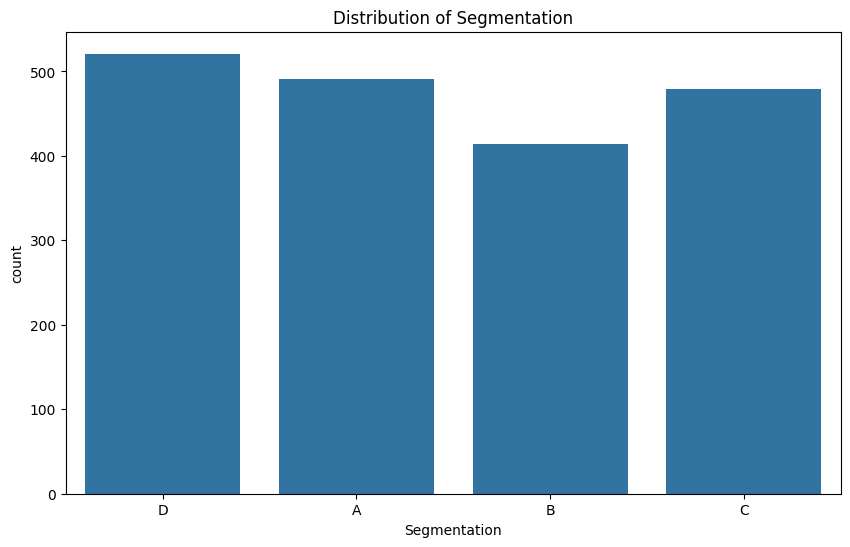

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Segmentation', data=data)
plt.title("Distribution of Segmentation")
plt.show()

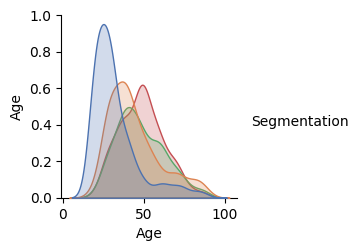

In [ ]:
sns.pairplot(data[['Age', 'Spending_Score', 'Segmentation']], hue='Segmentation', palette='deep')
plt.show()

In [ ]:
le = LabelEncoder()
data['Segmentation'] = le.fit_transform(data['Segmentation'])

In [ ]:
X = data.drop(columns='Segmentation')
y = data['Segmentation']

In [ ]:
categorical_columns = ['Gender', 'Ever_Married','Graduated','Profession','Spending_Score','Var_1','Segmentation']

le=LabelEncoder()

for col in categorical_columns:
  data[col]=le.fit_transform(data[col])


data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,1,0,22,0,5,1.0,2,4.0,3,3
1,462643,0,1,38,1,2,NaN,0,3.0,3,0
2,466315,0,1,67,1,2,1.0,2,1.0,5,1
3,461735,1,1,67,1,7,0.0,1,2.0,5,1
4,462669,0,1,40,1,3,NaN,1,6.0,5,0


In [ ]:
print(data['Spending_Score'].unique())

categorical_columns = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1', 'Segmentation']

le = LabelEncoder()

for col in categorical_columns:
    data[col] = le.fit_transform(data[col])

print(data['Spending_Score'].unique())

data.head()

X = data.drop('Segmentation', axis=1)
y = data['Segmentation']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X_train_imputed, y_train)

X_train_selected = selector.transform(X_train_imputed)
X_test_selected = selector.transform(X_test_imputed)

[2 0 1]
[2 0 1]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train = np.nan_to_num(X_train)
X_test = np.nan_to_num(X_test)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy on test set:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy on test set: 0.5196850393700787
Confusion Matrix:
 [[37  8 16 15]
 [19 10 39 16]
 [17  8 74 15]
 [21  3  6 77]]


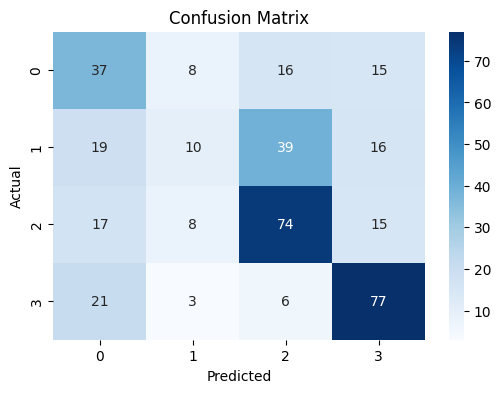

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()